# Exercise 2: Perceptron

In [1]:
import pandas
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import math

from utils import plotData
from YourAnswer import perceptron, perceptron_cost, perceptron_rule
from YourAnswer import sigmoid, logistic_regression_cost, logistic_regression_gradient, logistic_regression_predict
%matplotlib inline

In [2]:
data1 = pandas.read_csv("ex2data1.txt", header=None, names=['test1', 'test2', 'accepted'])
data1.head()

,test1,test2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Part 1: Plotting 
  We start the exercise by first plotting the data to understand the 
  the problem we are working with.

Plotting data with + indicating (y = 1) examples and o 
 indicating (y = 0) examples.

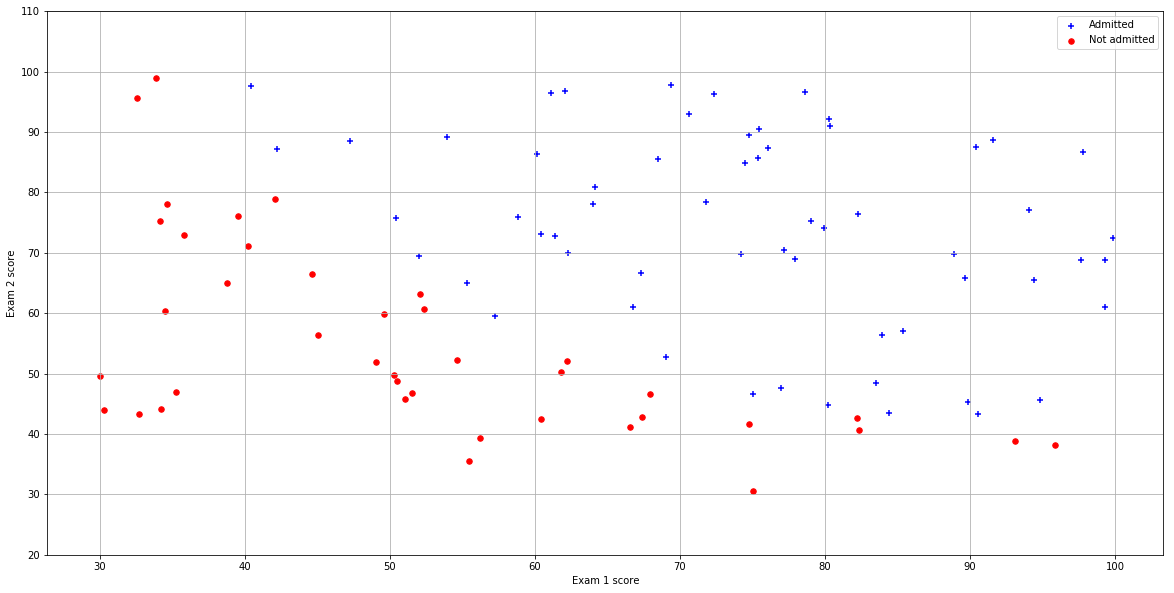

In [3]:
ax = plotData(data1)
ax.set_ylim([20, 110])
ax.legend(['Admitted', 'Not admitted'], loc='best')
ax.grid(True)
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [4]:
X = data1[['test1', 'test2']].values
y = data1.accepted.values
print(X.shape)
X = np.insert(X, 0, np.ones(len(X)), 1)
print(X.shape)

(100, 2)
(100, 3)


## Part 2: Compute Cost and Gradient

  In this part of the exercise, you will implement the cost and gradient
  for perceptron. You need to complete the code in 
  the function `perceptron`, `cost`, `perceptron_rule` <br><br>
  Before you start with the actual cost function, recall that the perceptron is defined as:<br><br>
  <center>$h_{\pmb{\theta}}(\mathbf{x})$ = 1 if $\pmb{\theta}^T\mathbf{\widetilde{x}}$ > 0<br></center>
  <center>$h_{\pmb{\theta}}(\mathbf{x})$ = 0 otherwise </center>
 

Now you will implement the cost function and update rule for perceptron. Complete the code in perceptron_cost and perceptron_rule to return the cost and gradient<br><br>
Recall that the cost function in perceptron is<br><br>
<center>$J(\pmb\theta)=-\frac{1}{n}\sum\limits_{i=1}^n \:(y^{(i)}-h_{\pmb\theta}(\mathbf x^{(i)}))(\pmb\theta^T\widetilde{\mathbf x}^{(i)})$</center><br>
and the gradient of perceptron is a vector of the same length as θ where the jth element (for j = 0,1,...,d) is defined as follows:<br><br>

<center>$\frac{\partial J(\pmb\theta)}{\partial \pmb\theta} = -\frac{1}{n}\sum\limits_{i=1}^n \:({y}^{(i)}-{h}_{\pmb\theta}({\mathbf x}^{(i)}))\widetilde{\mathbf x}^{(i)}$</center><br><br>
Note that while this gradient looks identical to the linear regression gra- dient, the formula is actually different because linear and logistic regression have different definitions of hθ(x).<br><br>

### To do:
- Implement `perceptron`, `perceptron_cost`, `perceptron_rule` in `YourAnswer.py` file.

In [5]:
# Initialzing theta, you should consider the input dimensions in practice
initial_theta = np.array([-400., 5., 1.])
print(initial_theta)
print(initial_theta.shape)

[-400.    5.    1.]
(3,)


The cost at initial theta (zeros) should be about `10.37`.

In [6]:
perceptron_cost(X, y, initial_theta)

10.37489081539473

The gradient at initial theta should be `[-0.1, -3.98, -9.69]`.

In [7]:
perceptron_rule(X, y, initial_theta)

array([-0.1       , -3.98650518, -9.69258326])

Update theta iteratively by using perceptron update rule

In [8]:
optimal_theta_p = initial_theta
n_iter = 10000
alpha = 0.03
old_cost = np.Inf
for i in range(n_iter):
    optimal_theta_p = optimal_theta_p - alpha*perceptron_rule(X, y, optimal_theta_p)
    cost = perceptron_cost(X, y, optimal_theta_p)
    if np.mod(i, 1) == 0:
        print ('Perceptron cost {:.4f} after iteration {}'.format(cost, i))
    if cost < 0.1 or cost/old_cost > 1:
        print ('Converged')
        break
    old_cost = cost

Perceptron cost 8.2770 after iteration 0
Perceptron cost 7.7799 after iteration 1
Perceptron cost 7.3521 after iteration 2
Perceptron cost 6.9716 after iteration 3
Perceptron cost 6.6096 after iteration 4
Perceptron cost 6.2476 after iteration 5
Perceptron cost 5.8856 after iteration 6
Perceptron cost 5.5236 after iteration 7
Perceptron cost 5.1616 after iteration 8
Perceptron cost 4.8010 after iteration 9
Perceptron cost 4.4727 after iteration 10
Perceptron cost 4.1889 after iteration 11
Perceptron cost 3.9437 after iteration 12
Perceptron cost 3.7159 after iteration 13
Perceptron cost 3.5370 after iteration 14
Perceptron cost 3.3773 after iteration 15
Perceptron cost 3.2176 after iteration 16
Perceptron cost 3.0579 after iteration 17
Perceptron cost 2.8983 after iteration 18
Perceptron cost 2.7386 after iteration 19
Perceptron cost 2.5789 after iteration 20
Perceptron cost 2.4192 after iteration 21
Perceptron cost 2.2771 after iteration 22
Perceptron cost 2.2071 after iteration 23
Pe

In [9]:
optimal_theta_p

array([-399.9967    ,    3.36134616,    3.01037137])

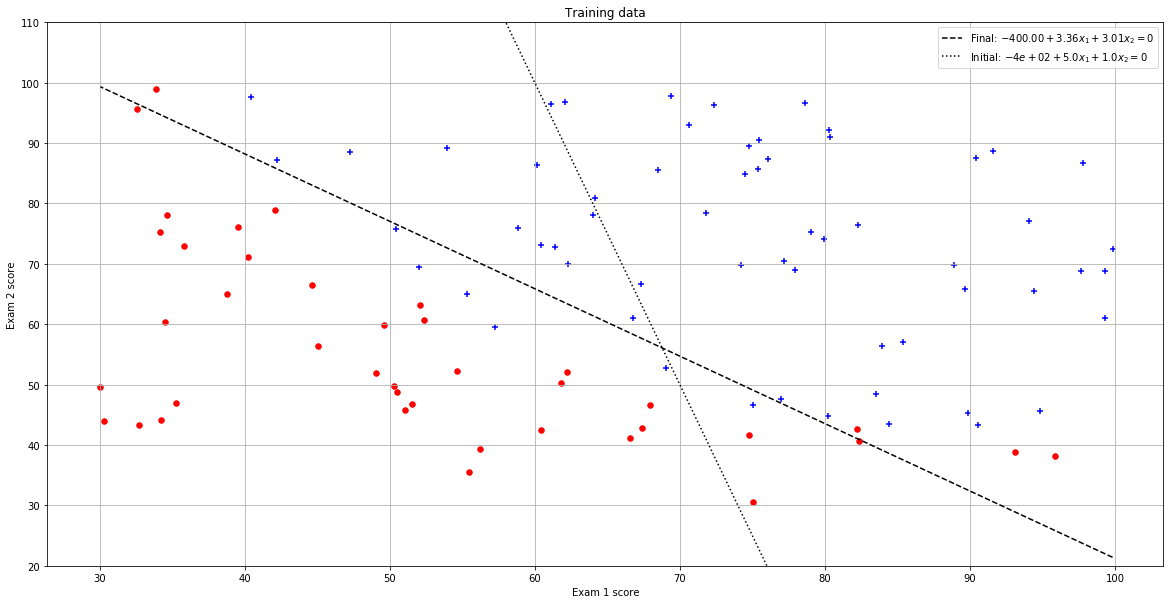

In [10]:
plt.figure()

ax = plotData(data1)
x_plot = np.array([np.max(X[:, 1]), np.min(X[:,1])])
y_plot = (-optimal_theta_p[0] - optimal_theta_p[1]*x_plot) / (optimal_theta_p[2])
plt_1 = ax.plot(x_plot, y_plot, 'k--')
y_plot_initial = (-initial_theta[0] - initial_theta[1]*x_plot) / (initial_theta[2])
plt_2 = ax.plot(x_plot, y_plot_initial, 'k:')
ax.set_ylim([20, 110])
ax.legend(['Final: ${:.2f} + {:.2f} x_1 + {:.2f} x_2 = 0$'.format(*list(optimal_theta_p)), 
           'Initial: ${:.2} + {:.2} x_1 + {:.2} x_2 = 0$'.format(*list(initial_theta))], 
          loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.grid(True)
plt.title('Training data')

plt.show()

# Exercise 3: Logistic Regression

## Part 1: Compute Cost and Gradient 
  In this part of the exercise, you will implement the cost and gradient
  for logistic regression. You need to complete the code in 
  the function `cost`.<br><br>
  Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:<br><br>
  <center>$h_{\pmb\theta}(\mathbf x)=g(\pmb\theta^T\widetilde{\mathbf x})$</center><br><br>
  where function g is the sigmoid function. The sigmoid function is defined as:<br><br>
  <center>$g(z)=\frac{1}{1+e^{-z}}$
  

Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient.<br><br>
Recall that the cost function in logistic regression is<br><br>
<center>$J(\pmb\theta)=-\frac{1}{n}\sum\limits_{i=1}^n \:[y^{(i)}\log(h_{\pmb\theta}(\mathbf x^{(i)})+(1-y^{(i)})\log(1-h_{\pmb \theta}(\mathbf x^{(i)})]$</center><br><br>

and the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0,1,...,d) is defined as follows:<br><br>

<center>$\frac{\partial J(\pmb\theta)}{\partial \theta} = -\frac{1}{n}\sum\limits_{i=1}^n \:({y}^{(i)}-{h}_{\pmb \theta}({\mathbf x}^{(i)}))\widetilde{\mathbf x}^{(i)}$</center><br><br>
Note that while this gradient looks identical to the linear regression gra- dient, the formula is actually different because linear and logistic regression have different definitions of hθ(x).<br><br>

### To do:
- Implement `sigmoid`, `logistic_regression_cost`, `logistic_regression_gradient` in `YourAnswer.py` file.

In [11]:
# Not a recommended way of initialzing theta, random initialization is used normally.
initial_theta = np.array([-0.03,-0.01,0.01])

The cost at initial theta (zeros) should be about `0.712`.

In [12]:
logistic_regression_cost(X, y, initial_theta)

0.7127852144882332

The gradient at initial theta should be `[-0.10, -13.34, -10.79]`.

In [13]:
logistic_regression_gradient(X, y, initial_theta)

array([ -0.10594135, -13.34340735, -10.79369538])

## Part 2: Optimizing using fminunc
  In this exercise, you will use a built-in function (scipy.optimize.fmin_ncg) to find the
  optimal parameters theta.


In [14]:
def mycost(t):
    return logistic_regression_cost(X, y, t)

def mygrad(t):
    return logistic_regression_gradient(X, y, t)

import time
start = time.time()


optimal_theta = scipy.optimize.fmin_ncg(mycost,
                                        initial_theta,
                                        fprime=mygrad)


stop = time.time()
print(stop - start)


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 25
         Function evaluations: 63
         Gradient evaluations: 211
         Hessian evaluations: 0
0.31167125701904297


Value of theta that minimizes the cost function:

In [15]:
optimal_theta

array([-25.14045504,   0.20606472,   0.20130265])

We plot the decision boundary.

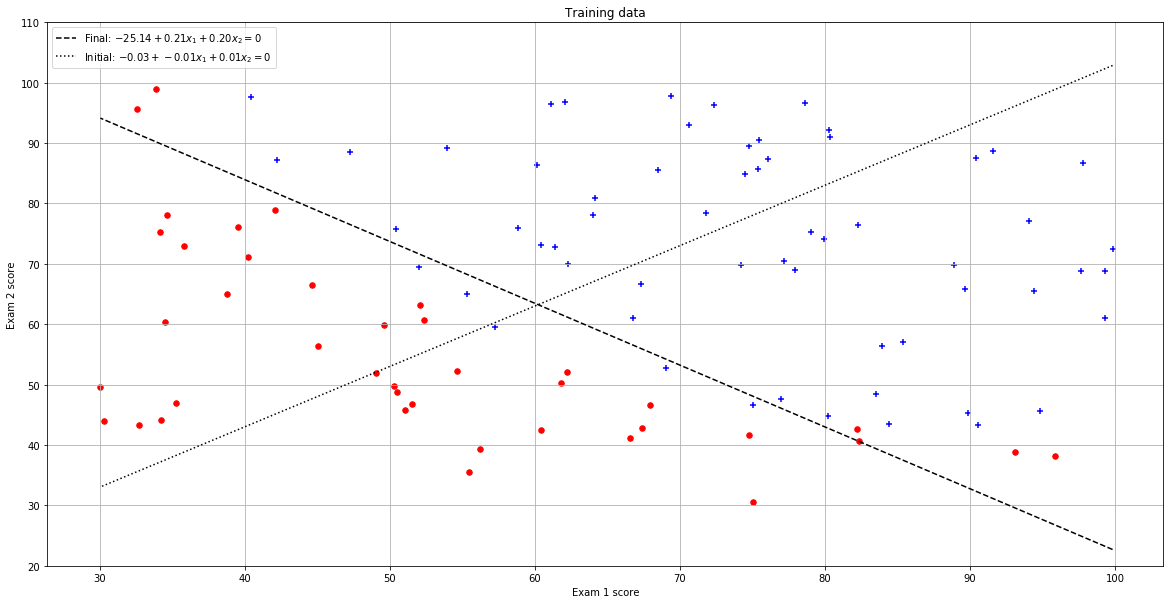

In [16]:
plt.figure()

ax = plotData(data1)
x_plot = np.array([np.max(X[:, 1]), np.min(X[:,1])])
y_plot = (-optimal_theta[0] - optimal_theta[1]*x_plot) / (optimal_theta[2])
plt_1 = ax.plot(x_plot, y_plot, 'k--')
y_plot_initial = (-initial_theta[0] - initial_theta[1]*x_plot) / (initial_theta[2])
plt_2 = ax.plot(x_plot, y_plot_initial, 'k:')
ax.set_ylim([20, 110])
ax.legend(['Final: ${:.2f} + {:.2f} x_1 + {:.2f} x_2 = 0$'.format(*list(optimal_theta)), 
           'Initial: ${:.2} + {:.2} x_1 + {:.2} x_2 = 0$'.format(*list(initial_theta))], 
          loc='best')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.grid(True)
plt.title('Training data')

plt.show()


In [17]:
def vis_decision_boundary_contour(X, w, typ='k--'):
    lim0 = plt.gca().get_xlim()
    lim1 = plt.gca().get_ylim()
    x_ = np.linspace(lim0[0], lim0[1], 100)
    y_ = np.linspace(lim1[0], lim1[1], 100)
    xx, yy = np.meshgrid(x_, y_)
    
    x_tra_ = np.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1)
    x_tra_ = np.insert(x_tra_, 0, np.ones(len(x_tra_)), 1)
    y = np.dot(x_tra_, w)
    pred = sigmoid(y)
    levels = np.array([0.0, 0.15, 0.3, 0.4, 0.5, 0.7, 0.85, 1.0])
    plt1 = plt.contourf(xx, yy, pred.reshape(xx.shape), cmap=plt.cm.coolwarm, alpha=0.4, levels=levels)
    plt.colorbar(plt1)
    
    plt.gca().set_xlim(lim0)
    plt.gca().set_ylim(lim1)
    
    return plt1

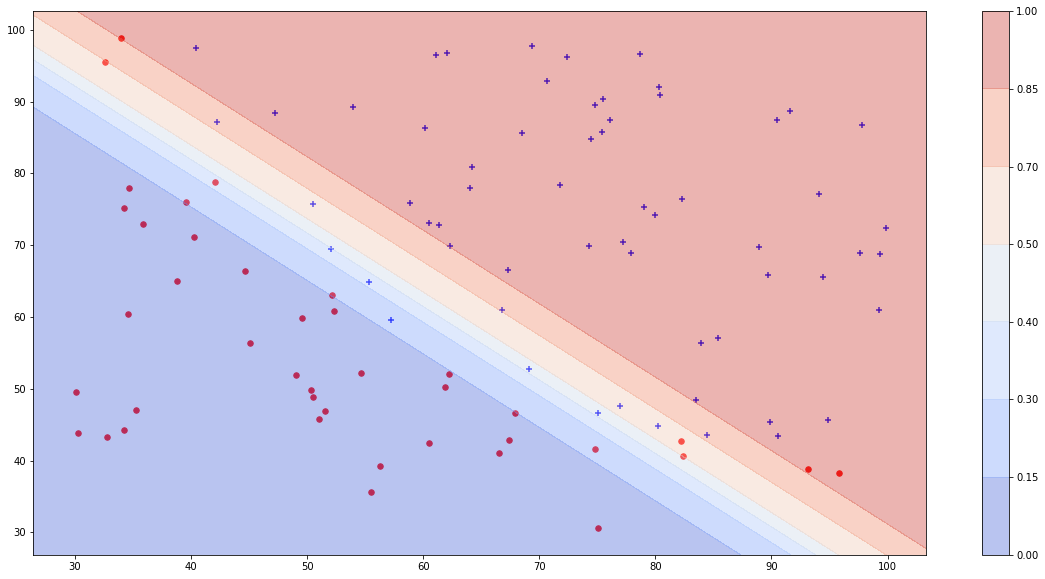

In [18]:
plotData(data1)
plt1 = vis_decision_boundary_contour(X, optimal_theta, 'k--')

## Part 3: Predict and Accuracies 
  After learning the parameters, you'll like to use it to predict the outcomes
  on unseen data. In this part, you will use the logistic regression model
  to predict the probability that a student with score 45 on exam 1 and 
  score 85 on exam 2 will be admitted.

  Furthermore, you will compute the training and test set accuracies of 
  our model.


### To do:
- Implement `logistic_regression_predict` in `YourAnswer.py` file.

Let's predict the admission probably of a student with scores 45 and 85:

In [19]:
logistic_regression_predict(optimal_theta, np.array([[1, 45, 85]]))

array([1.])

Training set accuracy:

In [20]:
print ('logistic regression, training accuracy : ' + str(np.mean(logistic_regression_predict(optimal_theta, X) == y)))

logistic regression, training accuracy : 0.89


In [21]:
print(X.dot(initial_theta))
print(initial_theta.dot(X))


[ 0.40401033  0.10608287  0.34054789  0.23125953 -0.0668836   0.08233094
  0.32404761 -0.31470732  0.08321783 -0.43899427 -0.60636277 -0.47410395
 -0.0882509   0.25354103  0.33498472  0.32236298 -0.19329674 -0.24268281
  0.19265628 -0.3240282  -0.27533589 -0.2687741  -0.04678977  0.06997468
 -0.11951731  0.04683444 -0.38368552 -0.57313718 -0.14574098  0.23209877
  0.08428598 -0.31352535  0.08019644  0.14387455  0.27930854 -0.0542122
  0.61953936  0.13731072 -0.36215838  0.3805408  -0.30594347 -0.0769143
 -0.31874446 -0.44750499 -0.0822505  -0.13161684 -0.09734835 -0.14043777
  0.3169576  -0.05868682 -0.08781699 -0.41273496 -0.50156112  0.22871829
 -0.03481957  0.07222274 -0.31784061  0.60021347 -0.0742412   0.036571
  0.07364325  0.08734401 -0.19992345  0.16534151  0.18781824 -0.28468796
  0.54077635 -0.00189351  0.08836487 -0.08755325  0.0758434   0.10992368
  0.20881099  0.09637112  0.14017492 -0.30458606  0.38211596  0.223517
 -0.20947147 -0.42506783 -0.22110108 -0.521402   -0.03729

ValueError: shapes (3,) and (100,3) not aligned: 3 (dim 0) != 100 (dim 0)